In [1]:
# data processing
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv(r"C:\Users\GS\Desktop\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv1D,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

In [6]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])
 
df['diagnosis'].unique()

array([1, 0])

In [7]:
y=df['diagnosis']
X = df.drop(columns=['diagnosis','id','Unnamed: 32'],axis=1)

In [8]:
print(X.shape,y.shape)

(569, 30) (569,)


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


As a CNN accepts only 3Dimensional data , we have to convert both X_train,X_test into 3D layers

In [12]:

X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [13]:
X_train

array([[[-1.44075296],
        [-0.43531947],
        [-1.36208497],
        ...,
        [ 0.9320124 ],
        [ 2.09724217],
        [ 1.88645014]],

       [[ 1.97409619],
        [ 1.73302577],
        [ 2.09167167],
        ...,
        [ 2.6989469 ],
        [ 1.89116053],
        [ 2.49783848]],

       [[-1.39998202],
        [-1.24962228],
        [-1.34520926],
        ...,
        [-0.97023893],
        [ 0.59760192],
        [ 0.0578942 ]],

       ...,

       [[ 0.04880192],
        [-0.55500086],
        [-0.06512547],
        ...,
        [-1.23903365],
        [-0.70863864],
        [-1.27145475]],

       [[-0.03896885],
        [ 0.10207345],
        [-0.03137406],
        ...,
        [ 1.05001236],
        [ 0.43432185],
        [ 1.21336207]],

       [[-0.54860557],
        [ 0.31327591],
        [-0.60350155],
        ...,
        [-0.61102866],
        [-0.3345212 ],
        [-0.84628745]]])

In [14]:
epochs = 50

model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [16]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 25s 156ms/step - loss: 0.3890 - accuracy: 0.8571 - val_loss: 0.4218 - val_accuracy: 0.9825
Epoch 2/50
15/15 [==============================] - 3s 238ms/step - loss: 0.1816 - accuracy: 0.9451 - val_loss: 0.3880 - val_accuracy: 0.9561
Epoch 3/50
15/15 [==============================] - 0s 33ms/step - loss: 0.0938 - accuracy: 0.9692 - val_loss: 0.3900 - val_accuracy: 0.9474
Epoch 4/50
15/15 [==============================] - 0s 34ms/step - loss: 0.0873 - accuracy: 0.9714 - val_loss: 0.3608 - val_accuracy: 0.9474
Epoch 5/50
15/15 [==============================] - 1s 35ms/step - loss: 0.1094 - accuracy: 0.9604 - val_loss: 0.3314 - val_accuracy: 0.9649
Epoch 6/50
15/15 [==============================] - 1s 39ms/step - loss: 0.0768 - accuracy: 0.9626 - val_loss: 0.3166 - val_accuracy: 0.9649
Epoch 7/50
15/15 [==============================] - 3s 186ms/step - loss: 0.0874 - accuracy: 0.9758 - val_loss: 0.3063 - val_accuracy: 0.9737
Epoch 8/5

In [18]:
def plot_learning(history,epoch):
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

- If validation accuracy is greater than Training accuracy it means the model isn't overfitting
- unless and untill validation loss goes above the Training loss we can keep on Training our model

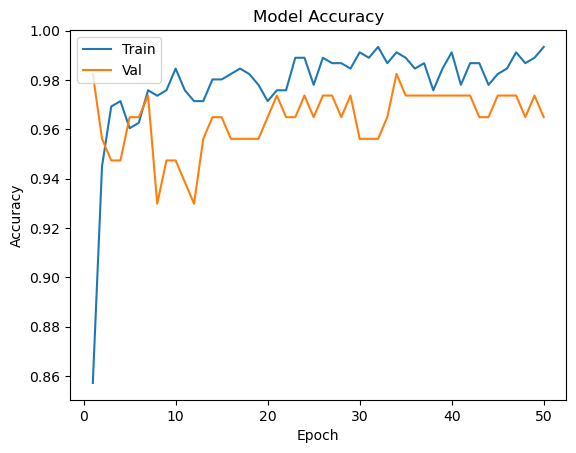

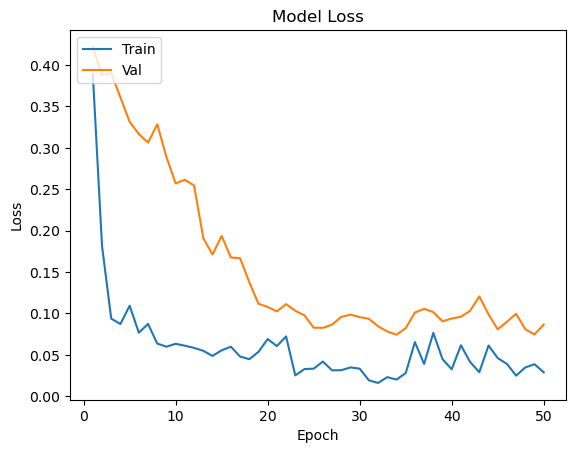

In [19]:
plot_learning(history,epochs)

In [20]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 4s 49ms/step


In [21]:
y_pred

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9649122807017544

<AxesSubplot:>

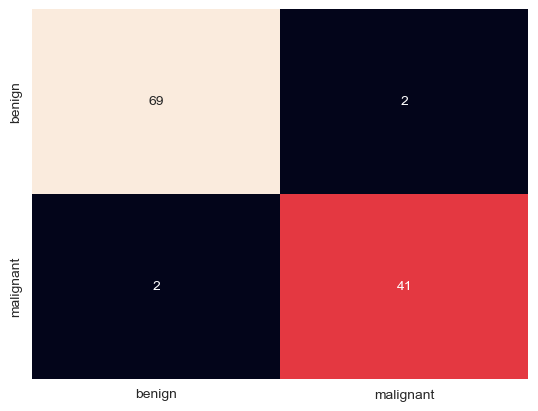

In [23]:
import seaborn as sns
sns.set_style("white")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False, xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])

In [24]:
import gradio as gr

In [25]:
def Cancer(radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst):

	x = np.array([radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst

]).reshape(1,30,1)

	prediction = model.predict(x)

	if int(prediction[0][0]) == 1:
		return "Malignant"
	else:
		return "Begign"


In [26]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=Cancer, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number','number',], outputs=outputs,description="This is a cancer model")

C:\Users\GS\anaconda3\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [27]:
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 264ms/step
